# Capstone Project - The Battle of Neighbourhoods

## Introduction

Toronto a city with a diverse ethinicity. Toronto has an estimated population of just over 2.8 million in 2016, which makes it the 4th most populous city in North America and the most populous Great Lakes city. Toronto, which is located on Lake Ontario, is the most populous city in Canada and the provincial capital of Ontario.

According to the 2016 Census, the racial composition of Toronto was: White: 50.2% East Indian: 12.7% (10.8% Chinese, 1.4% Korean, 0.5% Japanese) South Asian: 12.3% Black: 8.5% Southeast Asian: 7.0% (5.1% Filipino) Latin American: 2.8% West Asian: 2.0% Arab: 1.1% Aborginal: 0.7% (0.5% First Nations, 0.2% Metis) Two or more races: 1.5% Other race: 1.3%

The most common ancestry groups were: English (12.9%), Chinese (12.0%), Canadian (11.3%), Irish (9.7%), Scottish (9.5%), East Indian (7.6%), Italian (6.9%), Filipino (5.5%), German (4.6%), French (4.5%), and Polish (3.8%). Other common groups include Portuguese, Jamaican, Jewish, Ukranian and Russian.


With it's diverse culture , comes diverse food items. There are many resturants in New york City, each beloning to different categories like Chinese , Indian , French etc.

So as part of this project , we will list and visualize all major parts of Toronto that has great indian resturants.



## Question to be answered


> 1. What is best location in Toronto for Indian Cuisine ?
> 2. Which areas have potential Indian Resturant Market ?
> 3. Which all areas lack Indian Resturants ?
> 4. Which is the best place to stay if I prefer Indian Cuisine ?

## Data Source

<b>Toronto Neighbourhood Data :</b> 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'


<b>Geographical Coordinates :</b> http://cocl.us/Geospatial_data

<b>Foursquare API</b>  for the details about the neighbourhood

##### Install BeautifulSoup

In [1]:
#to install beautifulsoup4 please uncomment the below line
!conda install beautifulsoup4

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.8.0       |           py36_0         147 KB
    openssl-1.1.1d             |       h7b6447c_1         3.7 MB
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following packages will be UPDATED:

    beautifulsoup4: 4.7.1-py36_1      --> 4.8.0-py36_0     
    openssl:        1.1.1c-h7b6447c_1 --> 1.1.1d-h7b6447c_1


beautifulsoup4-4.8.0 | 147 KB    | ##################################### | 100% 
openssl-1.1.1d       | 3.7 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


##### Install Folium

In [149]:
#install Folium
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge

The following packages will be DOWNGRADED:

    folium: 0.10.0-py_0 conda-forge --> 0.5.0-py_0 conda-forge


folium-0.5.0         | 45 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [150]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import requests
from bs4 import BeautifulSoup
import os
import folium # map rendering library
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML

%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [4]:
#import Toronto data from weikepedia 
website_text = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(website_text,'xml')

table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

  
df = pd.DataFrame(data, columns=['PostalCode', 'Borough', 'Neighbourhood'])
df = df[~df['PostalCode'].isnull()]  # to filter out bad rows

In [5]:
df.head()

,PostalCode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront


#### Cleaning the data
Only process the cells that have an assigned borough. Ignore cells with a borough that is <b>Not assigned.</b>
Only process the cells that have an assigned neighbourhood. Ignore cells with a neighbourhood that is <b>Not assigned.</b>

In [6]:
#Drop records with Not Assigned Borough
indexNames = df[ df['Borough'] == 'Not assigned' ].index
df.drop(indexNames, inplace=True)



In [7]:

#Drop records with Not Assigned Neighbourhood
indexNames = df[ df['Neighbourhood'] == 'Not assigned' ].index
df.drop(indexNames, inplace=True)

In [8]:
df.head()

,PostalCode,Borough,Neighbourhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M5A,Downtown Toronto,Regent Park
7,M6A,North York,Lawrence Heights


In [9]:
df.shape

(210, 3)

In [10]:
#read the coordinate from the csv file
dfCordinates = pd.read_csv('http://cocl.us/Geospatial_data')

In [11]:
dfCordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [58]:
#join both the dataframes to get the cordinates for the postal codes
dfCordinates.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
dfToronto = pd.merge(df, dfCordinates, on='PostalCode', how='left')
dfToronto.head()



,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
4,M6A,North York,Lawrence Heights,43.718518,-79.464763


In [59]:
dfToronto.rename(columns={'Neighbourhood':'Neighborhood'},inplace=True)

In [60]:
dfToronto.shape

(210, 5)

<b>There are 120 neighbourhoods </b>

In [61]:
dfToronto.head()


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
4,M6A,North York,Lawrence Heights,43.718518,-79.464763


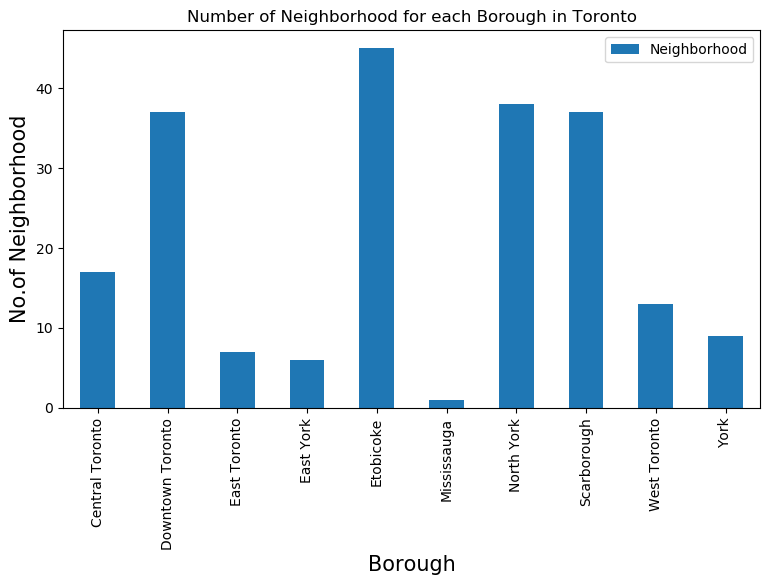

In [62]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
dfToronto.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

<b>Etobicoke</b> has the highest number of Neighbourhood


Foursquare details to login:

In [63]:
CLIENT_ID = 'CLIENT ID' # your Foursquare ID
CLIENT_SECRET = 'CLIENT SECRET' # your Foursquare Secret
VERSION = '20180604'
radius = 500
LIMIT = 30


We define a function to intract with FourSquare API and get top 100 venues within a radius of 1000 metres for a given latitude and longitude. Below function will return us the venue id , venue name and category.

In [64]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                  'VenueId',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [65]:
toronto_venue = getNearbyVenues(names=dfToronto['Neighborhood'],
                                   latitudes=dfToronto['Latitude'],
                                   longitudes=dfToronto['Longitude']
                                  )

In [66]:
print(toronto_venue.shape)

(2632, 8)


In [67]:
toronto_venue.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueId,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,4e8d9dcdd5fbbbb6b3003c7b,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,4cb11e2075ebb60cd1c4caad,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,4c633acb86b6be9a61268e34,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,4bbe904a85fbb713420d7167,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,4f3ecce6e4b0587016b6f30d,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [68]:
indian_resturant = toronto_venue[toronto_venue['Venue Category'] == 'Indian Restaurant']

In [69]:
indian_resturant.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueId,Venue,Venue Latitude,Venue Longitude,Venue Category
512,Thorncliffe Park,43.705369,-79.349372,4daf08e66e81e2dffdd4fe40,Iqbal Kebab & Sweet Centre,43.705923,-79.351521,Indian Restaurant
517,Thorncliffe Park,43.705369,-79.349372,4bed9f2fbac3c9b6ad93fee9,Hakka Garden,43.704578,-79.349770,Indian Restaurant
957,The Danforth West,43.679557,-79.352188,4c1d5337eac020a1cb1048c2,Sher-E-Punjab,43.677308,-79.353066,Indian Restaurant
987,Riverdale,43.679557,-79.352188,4c1d5337eac020a1cb1048c2,Sher-E-Punjab,43.677308,-79.353066,Indian Restaurant
1319,Bedford Park,43.733283,-79.419750,4d796616542ab1f75eb87c41,The Copper Chimney,43.736195,-79.420271,Indian Restaurant


Get the number of Indian Resturants per neighbourhood

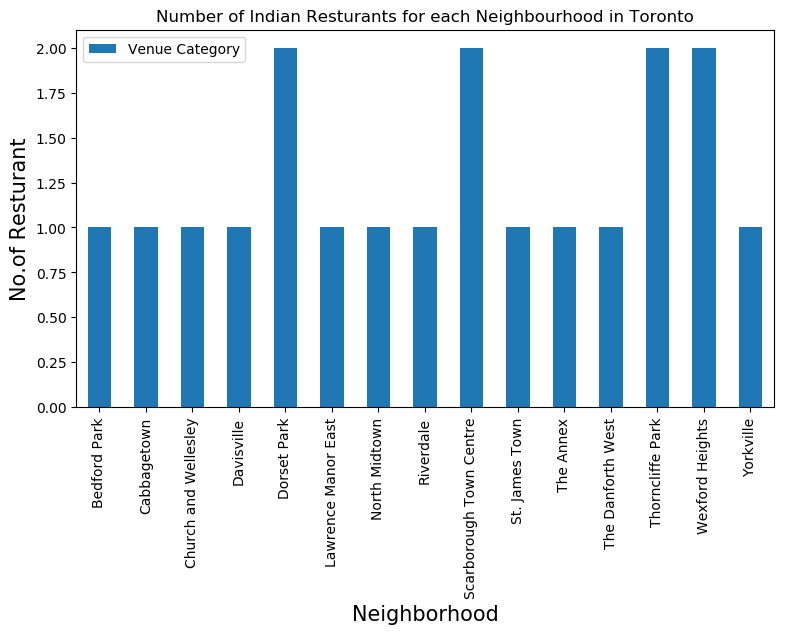

In [70]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Neighbourhood in Toronto')
#On x-axis
plt.xlabel('Neighbourhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Resturant', fontsize=15)
#giving a bar plot
indian_resturant.groupby('Neighborhood')['Venue Category'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [71]:
indian_resturant['Neighborhood'].unique()
#df['Borough'].unique()

array(['Thorncliffe Park', 'The Danforth West', 'Riverdale',
       'Bedford Park', 'Lawrence Manor East', 'Dorset Park',
       'Scarborough Town Centre', 'Wexford Heights', 'The Annex',
       'North Midtown', 'Yorkville', 'Davisville', 'Cabbagetown',
       'St. James Town', 'Church and Wellesley'], dtype=object)

In [75]:
df2 = pd.merge(indian_resturant,dfToronto,on = 'Neighborhood')



In [76]:
df2.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueId,Venue,Venue Latitude,Venue Longitude,Venue Category,PostalCode,Borough,Latitude,Longitude
0,Thorncliffe Park,43.705369,-79.349372,4daf08e66e81e2dffdd4fe40,Iqbal Kebab & Sweet Centre,43.705923,-79.351521,Indian Restaurant,M4H,East York,43.705369,-79.349372
1,Thorncliffe Park,43.705369,-79.349372,4bed9f2fbac3c9b6ad93fee9,Hakka Garden,43.704578,-79.349770,Indian Restaurant,M4H,East York,43.705369,-79.349372
2,The Danforth West,43.679557,-79.352188,4c1d5337eac020a1cb1048c2,Sher-E-Punjab,43.677308,-79.353066,Indian Restaurant,M4K,East Toronto,43.679557,-79.352188
3,Riverdale,43.679557,-79.352188,4c1d5337eac020a1cb1048c2,Sher-E-Punjab,43.677308,-79.353066,Indian Restaurant,M4K,East Toronto,43.679557,-79.352188
4,Bedford Park,43.733283,-79.419750,4d796616542ab1f75eb87c41,The Copper Chimney,43.736195,-79.420271,Indian Restaurant,M5M,North York,43.733283,-79.419750


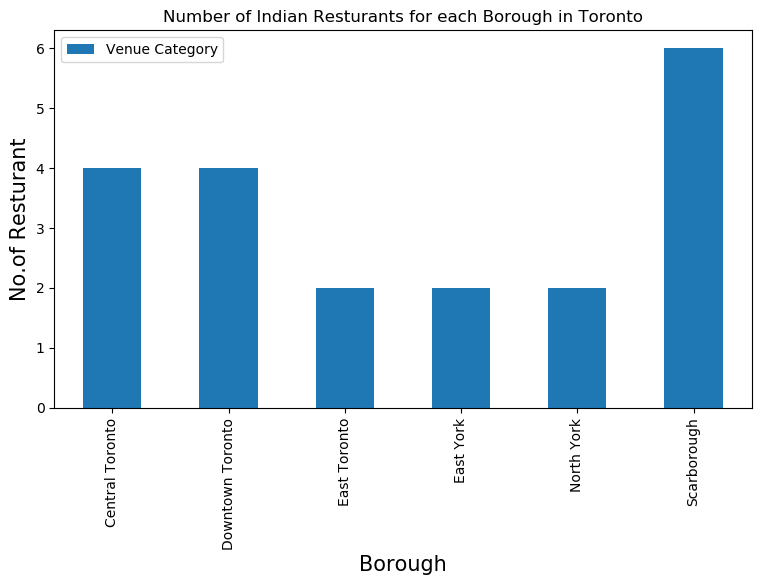

In [77]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Resturant', fontsize=15)
#giving a bar plot
df2.groupby('Borough')['Venue Category'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

### Analysis Set 1
> 1. <b>Etobicoke</b> has the maximum number of neighbourhoods 
> 2. Etobicoke does not have an <b>Indian Resturant</b>
> 3. <b>Scarborough</b> has 6 Indian Resturant
> 4. <b>Central Toronto</b> and <b>Downtown Toronto</b> has 4 Indian Resturant each.

### Let us analyze the user feedback for each of the resturants.

Below function is to get venue details like count, rating and tip for a given venue id

In [106]:
def get_venue_details(venue_id):
        
    #CLIENT_ID = os.environ['CLIENT_ID'] # your Foursquare ID
    #CLIENT_SECRET = os.environ['CLIENT_SECRET'] # your Foursquare Secret
    #VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [90]:
Indi_resturant = df2[['Borough','Neighborhood','Venue','VenueId']]

In [91]:
Indi_resturant.head()

,Borough,Neighborhood,Venue,VenueId
0,East York,Thorncliffe Park,Iqbal Kebab & Sweet Centre,4daf08e66e81e2dffdd4fe40
1,East York,Thorncliffe Park,Hakka Garden,4bed9f2fbac3c9b6ad93fee9
2,East Toronto,The Danforth West,Sher-E-Punjab,4c1d5337eac020a1cb1048c2
3,East Toronto,Riverdale,Sher-E-Punjab,4c1d5337eac020a1cb1048c2
4,North York,Bedford Park,The Copper Chimney,4d796616542ab1f75eb87c41


In [116]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats=pd.DataFrame(columns=column_names)
count=1


for row in Indi_resturant.values.tolist():
    Borough,Neighborhood,Venue,VenueId=row
    try:
        venue_details=get_venue_details(VenueId)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',VenueId)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(df2),')','processed')
    indian_rest_stats = indian_rest_stats.append({'Borough': Borough,
                                                'Neighborhood':Neighborhood, 
                                                'ID': id,
                                                'Name' : Venue,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)


    count+=1

                         ID                        Name  Likes  Rating  Tips
0  4daf08e66e81e2dffdd4fe40  Iqbal Kebab & Sweet Centre     13     8.0     7
( 1 / 20 ) processed
                         ID          Name  Likes  Rating  Tips
0  4bed9f2fbac3c9b6ad93fee9  Hakka Garden     10     6.5    12
( 2 / 20 ) processed
                         ID           Name  Likes  Rating  Tips
0  4c1d5337eac020a1cb1048c2  Sher-E-Punjab     10     7.5     7
( 3 / 20 ) processed
                         ID           Name  Likes  Rating  Tips
0  4c1d5337eac020a1cb1048c2  Sher-E-Punjab     10     7.5     7
( 4 / 20 ) processed
                         ID                Name  Likes  Rating  Tips
0  4d796616542ab1f75eb87c41  The Copper Chimney     14     7.1    15
( 5 / 20 ) processed
                         ID                Name  Likes  Rating  Tips
0  4d796616542ab1f75eb87c41  The Copper Chimney     14     7.1    15
( 6 / 20 ) processed
                         ID     Name  Likes  Rating  Tips
0  5

In [117]:
indian_rest_stats

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,East York,Thorncliffe Park,4daf08e66e81e2dffdd4fe40,Iqbal Kebab & Sweet Centre,13,8.0,7
1,East York,Thorncliffe Park,4bed9f2fbac3c9b6ad93fee9,Hakka Garden,10,6.5,12
2,East Toronto,The Danforth West,4c1d5337eac020a1cb1048c2,Sher-E-Punjab,10,7.5,7
3,East Toronto,Riverdale,4c1d5337eac020a1cb1048c2,Sher-E-Punjab,10,7.5,7
4,North York,Bedford Park,4d796616542ab1f75eb87c41,The Copper Chimney,14,7.1,15
5,North York,Lawrence Manor East,4d796616542ab1f75eb87c41,The Copper Chimney,14,7.1,15
6,Scarborough,Dorset Park,5226562611d2cd49d83ef03b,Kairali,9,7.6,6
7,Scarborough,Dorset Park,4bf96c435317a593a23a017f,Karaikudi Chettinad South Indian Restaurant,27,6.1,23
8,Scarborough,Scarborough Town Centre,5226562611d2cd49d83ef03b,Kairali,9,7.6,6
9,Scarborough,Scarborough Town Centre,4bf96c435317a593a23a017f,Karaikudi Chettinad South Indian Restaurant,27,6.1,23


Resturant with high likes

In [123]:
indian_rest_stats[indian_rest_stats['Likes'] ==indian_rest_stats['Likes'].max()]

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
12,Central Toronto,The Annex,4c62c59ce1621b8dd0332453,Roti Cuisine of India,39,8.7,18
13,Central Toronto,North Midtown,4c62c59ce1621b8dd0332453,Roti Cuisine of India,39,8.7,18
14,Central Toronto,Yorkville,4c62c59ce1621b8dd0332453,Roti Cuisine of India,39,8.7,18


Resturants with high ratings

In [124]:
indian_rest_stats[indian_rest_stats['Rating'] ==indian_rest_stats['Rating'].max()]

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
12,Central Toronto,The Annex,4c62c59ce1621b8dd0332453,Roti Cuisine of India,39,8.7,18
13,Central Toronto,North Midtown,4c62c59ce1621b8dd0332453,Roti Cuisine of India,39,8.7,18
14,Central Toronto,Yorkville,4c62c59ce1621b8dd0332453,Roti Cuisine of India,39,8.7,18


Average Rating by Borough

In [128]:
indian_rest_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Borough         20 non-null object
Neighborhood    20 non-null object
ID              20 non-null object
Name            20 non-null object
Likes           20 non-null object
Rating          20 non-null float64
Tips            20 non-null object
dtypes: float64(1), object(6)
memory usage: 1.2+ KB


In [136]:
df_ratings = indian_rest_stats[['Borough','Rating']]
df_ratings

,Borough,Rating
0,East York,8.0
1,East York,6.5
2,East Toronto,7.5
3,East Toronto,7.5
4,North York,7.1
5,North York,7.1
6,Scarborough,7.6
7,Scarborough,6.1
8,Scarborough,7.6
9,Scarborough,6.1


In [143]:
df_ratings.groupby(['Borough']).first()

,Rating
Borough,
Central Toronto,8.7
Downtown Toronto,8.5
East Toronto,7.5
East York,8.0
North York,7.1
Scarborough,7.6


Resturants in <b>Central Torornto</b> has high ratings.The resturants in <b>Downtown Toronto</b> is eqally good. There are not good Indian Resturants in <b>North York</b>.

In [157]:
venues_map = folium.Map(location=[43.651070, -79.347015], zoom_start=15) # generate map centred around Ecco

# add popular spots to the map as blue circle markers
for lat, lng, label in zip(df2.Latitude, df2.Longitude, df2.Venue):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

## Conclusion

> 1. <b>Etobicoke</b> has the maximum number of neighbourhoods.Etobicoke does not have an <b>Indian Resturant</b>.
> 2. <b>North York</b> has 2 Indian Resturant with the lowest rating. North York are potential Borough to open new good Indian Resturant 
> 3. <b>Scarborough</b> has 6 Indian Resturant. It is the best place to stay if you prefer Indian Cuisine. 
> 4. <b>Central Toronto</b> and <b>Downtown Toronto</b> has good resturants. These places need to be visited for good food.